# UCI Echocardiogram Data Exploration

The UCI Machine Learning Repository has a dataset
of echocardoigram results.  The data can be found here:
http://archive.ics.uci.edu/ml/datasets/Echocardiogram

The dataset is comprised of measurements from 132 patients who suffered heart attacks.  Each patient received an echocardiogram
after the heart attack and results were recorded.  

The target characteristic is the `alive-at-1` variable, which determines whether the patients were still alive one year after suffering their heart attack.

Here is a listing of all of the columns in the dataset:

```
1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above. 
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive 
3. age-at-heart-attack -- age in years when heart attack occurred 
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal 
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal. 
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts. 
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving 
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score. 
10. mult -- a derivate var which can be ignored 
11. name -- the name of the patient (I have replaced them with "name") 
12. group -- meaningless, ignore it 
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.


```


In [1]:
# Start by importing necessary modules
import pandas
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data 

Although not explicitly described as CSV, the data is comma delimited.  Try to use pandas to read it directly.

The dataset indicates that missing values are denoted by `?`, so add
that to the list pandas will use.

In [2]:
dataFile = "data/echocardiogram_data.txt"
try:
  ecg = pandas.read_csv(dataFile, na_values=["?"],
                        header=None)
except Exception as e:
    print e

Error tokenizing data. C error: Expected 13 fields in line 50, saw 14



So there's something wrong with line 50.

What is it?

In [3]:
# Grab that one line
line50 = open(dataFile).readlines()[49]
print line50
# Chop it up 
fields = line50.split(",")
print fields
print len(fields)


,?,?,77,?,?,?,?,?,2,?,name,2,?

['', '?', '?', '77', '?', '?', '?', '?', '?', '2', '?', 'name', '2', '?\n']
14


Alright, that's indeed bad.  Worse, the `name` column is two entries from the end, as it should be.  This means that extra field is somewhere in the middle.

Well, at least the rest of the information looks sparse enough
that this record is useless. 

So, pandas has an option to skip lines with too many fields.  By default it will warn us for each bad line.

In [4]:
try:
  ecg = pandas.read_csv(dataFile, na_values=["?"],
                       error_bad_lines=False)
except Exception as e:
    print e

Skipping line 50: expected 13 fields, saw 14



Ok, so there's only one with too many lines.

Are there lines that are truncated?

In [5]:
for i, line in enumerate(open(dataFile).readlines()):
  if len(line.strip().split(",")) != 13:
    print "Bad line: %s, length: %s" % (i, len(line.strip().split(",")))

Bad line: 49, length: 14


Ok, so there's only one of those.

Now `ecg` has our data.

Take a look at it

In [6]:
ecg.head()

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6.000,4.100,14,1.70,0.588,name,1,0
1,16,0,55,0,0.260,4.000,3.420,14,1.00,1.000,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0
3,19,1,57,0,0.160,22.000,5.750,18,2.25,0.571,name,1,0
4,26,0,68,0,0.260,5.000,4.310,12,1.00,0.857,name,1,0


Oh, there's no header there.
Put the column names in a file.  Load it in, then reload
the dataset.

In [7]:
columns = [line.strip() for line in open("data/columns.txt").readlines()]

try:
  ecg = pandas.read_csv(dataFile, na_values=["?"],
                       error_bad_lines=False,
                       names=columns)
except Exception as e:
    print e

In [8]:
ecg.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,alive_at_1
0,11,0,71,0,0.260,9.000,4.600,14,1.00,1.000,name,1,0
1,19,0,72,0,0.380,6.000,4.100,14,1.70,0.588,name,1,0
2,16,0,55,0,0.260,4.000,3.420,14,1.00,1.000,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0
4,19,1,57,0,0.160,22.000,5.750,18,2.25,0.571,name,1,0


## Missing data

Three are a number of missing values

The dataset description gives this listing:
```
   Attribute #:    Number of Missing Values: (total: 132)
   ------------    -------------------------
              1    2
              2    1
              3    5
              4    1
              5    8
              6    15
              7    11
              8    4
              9    1
             10    4
             11    0
             12    22
             13    58
```

Check that the results are consistent with what's in the dataframe


In [9]:
# Turn listing above into series
expectedMissing = pandas.Series([2, 1, 5, 1, 8, 15, 11, 4, 1, 4, 0, 22, 58],
                               index=columns)
# Get the actual missing values from pandas
actualMissing = pandas.isnull(ecg).sum()
# Compare
difference = actualMissing - expectedMissing
difference.sort()
print difference[difference != 0]


pericardial_effusion   -1
mult                   -1
alive_at_1             -1
age_at_heart_attack     1
wall_motion_index       1
name                    1
dtype: int64


Ok, that's not actually terribly consistent, but it's close.
Extra missing values in `age_at_heart_attack`, `wall_motion_index`, and `name`.  The last one doesn't matter.
The columns with fewer missing values are presumedly from the skipped row.

Ok, now let's see the missing values in something slightly more human readable.

In [10]:
print actualMissing

survival                  2
still_alive               1
age_at_heart_attack       6
pericardial_effusion      0
fractional_shortening     8
epss                     15
lvdd                     11
wall_motion_score         4
wall_motion_index         2
mult                      3
name                      1
group                    22
alive_at_1               57
dtype: int64


Missing values for survival and still_alive cannot be interpreted.  Drop those.


In [11]:
ecg = ecg[ecg.survival.notnull()]
ecg = ecg[ecg.still_alive.notnull()]

There are patients who have not been tracked for a year and are still
alive.  This is bad data that should not be included in the model. 
Use this bit of info from the description.

      Because all the patients
      had their heart attacks at different times, it is 
      possible that some patients have survived less than
      one year but they are still alive.  Check the second
      variable to confirm this.  Such patients cannot be 
      used for the prediction task mentioned above.

In [12]:
recent = ecg[(ecg.survival < 12) & ecg.still_alive].copy()
print len(recent)

34


Well, that's a bummer, just about a quarter of the dataset.  But 
it's definitely bogus data that we should not try to use.

In [13]:
# filter out those entries
lBefore = len(ecg)
ecg = ecg[~((ecg.survival < 12) & ecg.still_alive)]
lAfter = len(ecg)
print "Dropped %s entries" % (lBefore - lAfter)

Dropped 34 entries


Drop the `name`, `mult`, and `group` columns, they are useless to us

In [14]:
del ecg['name']
del ecg['group']
del ecg['mult']


## Quick snapshot

Start with a seaborn pairplot.  This is a really quick way to take a snapshot of the data.


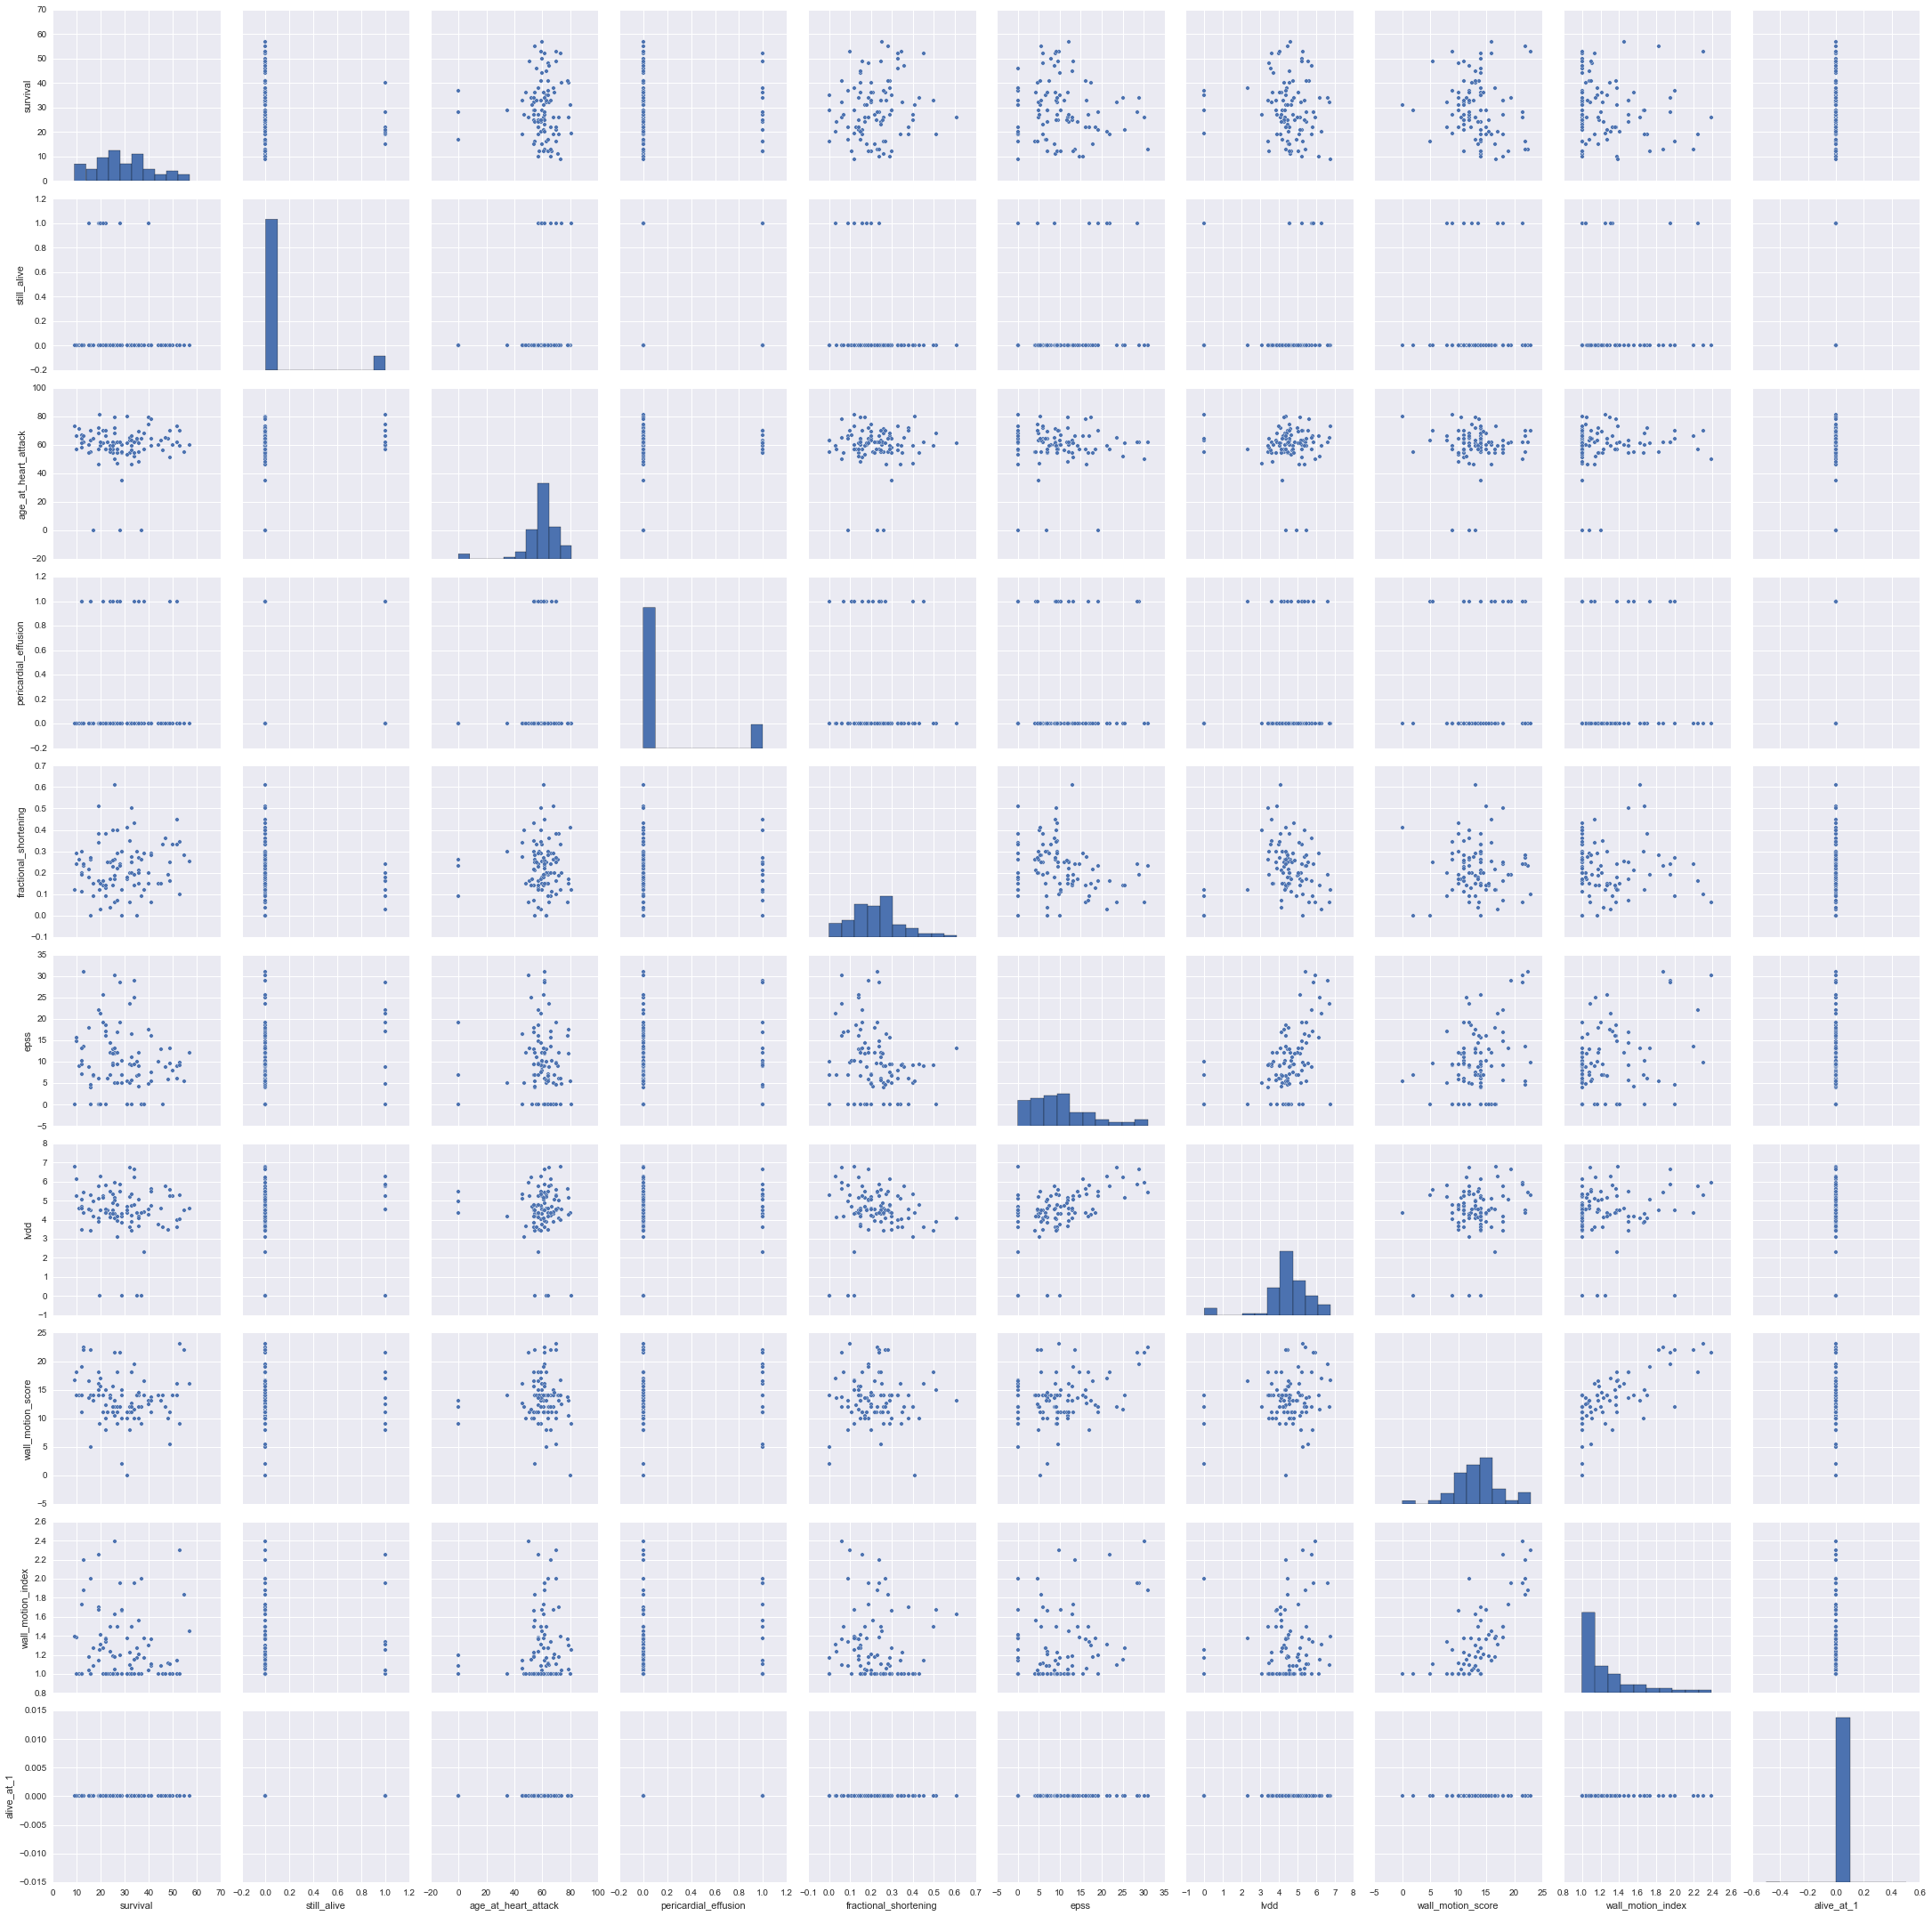

In [15]:
ecgNoMissing = ecg.fillna(0)
seaborn.pairplot(ecgNoMissing, dropna=True)

What's going on with `alive_at_1`?

Everyone is dead?  

I think that variable is just bogus.


In [16]:
ecg[ecg.survival < 12]

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
0,11,0,71,0,0.26,9.0,4.60,14.00,1.00,0
52,10,0,57,0,0.24,14.8,5.26,18.00,1.38,NaN
55,10,0,66,0,0.29,15.6,6.15,14.00,1.00,0
61,9,0,73,0,0.12,NaN,6.78,16.67,1.39,NaN


Ok, so the number or subjects who survived less than a year
is extremely small.

Rather than treating this as a classification problem to determine whether
patients will survive for a year, lets instead try to treat as a regression problem to determine the number of months a patient will survive.

This leads to the following cleaning step to get the data we want.

In [20]:
def loadData():
  ecg = pandas.read_csv(dataFile, na_values=["?"],
                        error_bad_lines=False,
                        names=columns)
  
  # Remove subjects missing essential data and those still alive
  ecg = ecg[ecg.survival.notnull()]
  ecg = ecg[ecg.still_alive.notnull()]
  ecg = ecg[ecg.still_alive == 0]
  # Drop columns which won't provide information 
  del ecg['name']
  del ecg['group']
  del ecg['mult']
  del ecg['still_alive']
  del ecg['alive_at_1']

  return ecg


In [21]:
ecgFinal = loadData()

In [19]:
len(ecgFinal)

88

# Conclusion

There's not enough data to attempt classifiction to identify patients
who will survive for one year.  Instead, try a regression problem
with the survival duration as as target variable.

The function above can be used to clean the data, and will be put into a
module called `ecg_tools`
